In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/StudentsPerformance.csv')

In [ ]:
display(data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
from pandas.io.parsers.python_parser import count_empty_vals
import pandas as pd

import pandas as pd

# Loading the data
data = pd.read_csv('/content/drive/MyDrive/StudentsPerformance.csv')  # Replace with the actual filename/path

# Initial column count
initial_column_count = len(data.columns)

# Data Cleaning
# Convert text columns to lowercase
text_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
data[text_columns] = data[text_columns].apply(lambda x: x.str.lower())
data = data.dropna()

# Map similar categories to a common format
data['lunch'] = data['lunch'].map({'standard': 'standard lunch', 'free/reduced': 'free/reduced lunch'})


# Ensure scores are within a reasonable range
data = data[(data['math score'] >= 0) & (data['math score'] <= 100)]
data = data[(data['reading score'] >= 0) & (data['reading score'] <= 100)]
data = data[(data['writing score'] >= 0) & (data['writing score'] <= 100)]

# Calculating the number of columns dropped and modified
columns_dropped = initial_column_count - len(data.columns)
columns_modified = len(text_columns) - 2  # Minus 2 because "gender" and "test preparation course" columns were not modified

# Creating a new dataset with the cleaned data
cleaned_data_1_2 = data.copy()

# Saving the cleaned dataset to a new CSV file
cleaned_file_path = '/content/drive/MyDrive/cleaned_data_1_2.csv'  # Replace with the desired filename/path
cleaned_data_1_2.to_csv(cleaned_file_path, index=False)

# Printing the cleaned dataset
print(cleaned_data_1_2)

# Printing the number of columns dropped and modified
print(f"Columns Dropped: {columns_dropped}")
print(f"Columns Modified: {columns_modified}")


     gender race/ethnicity parental level of education               lunch  \
0    female        group b           bachelor's degree      standard lunch   
1    female        group c                some college      standard lunch   
2    female        group b             master's degree      standard lunch   
3      male        group a          associate's degree  free/reduced lunch   
4      male        group c                some college      standard lunch   
..      ...            ...                         ...                 ...   
995  female        group e             master's degree      standard lunch   
996    male        group c                 high school  free/reduced lunch   
997  female        group c                 high school  free/reduced lunch   
998  female        group d                some college      standard lunch   
999  female        group d                some college  free/reduced lunch   

    test preparation course  math score  reading score  writing

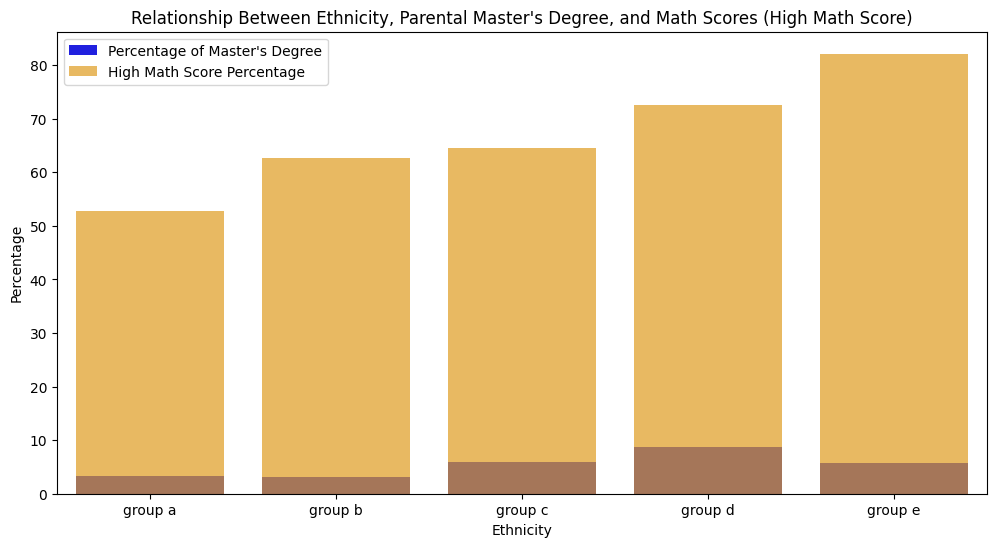

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the cleaned dataset
data = pd.read_csv('/content/drive/MyDrive/cleaned_data_1_2.csv')

# Calculating the percentage of parents with master's level education by ethnicity
master_education_by_ethnicity = data[data['parental level of education'] == "master's degree"]
percentage_master_by_ethnicity = (master_education_by_ethnicity.groupby('race/ethnicity').size() / data.groupby('race/ethnicity').size()) * 100

# Calculating the average math scores by ethnicity
average_math_scores_by_ethnicity = data.groupby('race/ethnicity')['math score'].mean()

# Defining a function to categorize math scores as low or high
def categorize_math_score(score):
    return 'Low' if score < 60 else 'High'

data['Math Score Category'] = data['math score'].apply(categorize_math_score)

# Creating a DataFrame to hold the data
df = pd.DataFrame({
    'Ethnicity': percentage_master_by_ethnicity.index,
    'Percentage of Master\'s Degree': percentage_master_by_ethnicity.values,
    'Math Score Category': data.groupby('race/ethnicity')['Math Score Category'].value_counts(normalize=True).loc[:, 'High'] * 100
})

# Creating a bar plot to visualize the relationship with color differentiation
plt.figure(figsize=(12, 6))
sns.barplot(x='Ethnicity', y='Percentage of Master\'s Degree', data=df, color='blue', label='Percentage of Master\'s Degree')
sns.barplot(x='Ethnicity', y='Math Score Category', data=df, color='orange', alpha=0.7, label='High Math Score Percentage')
plt.title('Relationship Between Ethnicity, Parental Master\'s Degree, and Math Scores (High Math Score)')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()


the graph clearly represents that there is no much added advantage for scores of students with regard to parental level of education, the group E with high number of High Math score percentage have 3rd lowest percentage of Master degree in parental education.

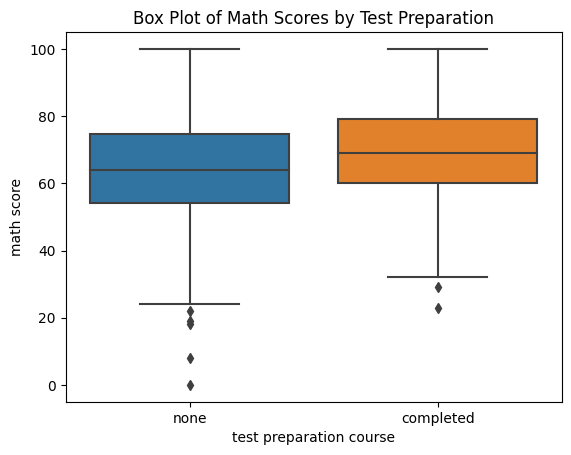

In [ ]:
# Box Plot of Test Preparation vs. Math Scores (Seaborn)
sns.boxplot(x='test preparation course', y='math score', data=data)
plt.title('Box Plot of Math Scores by Test Preparation')
plt.show()

there is a visible improvement in students taking test preparation course,also adds upto the confidence they gain

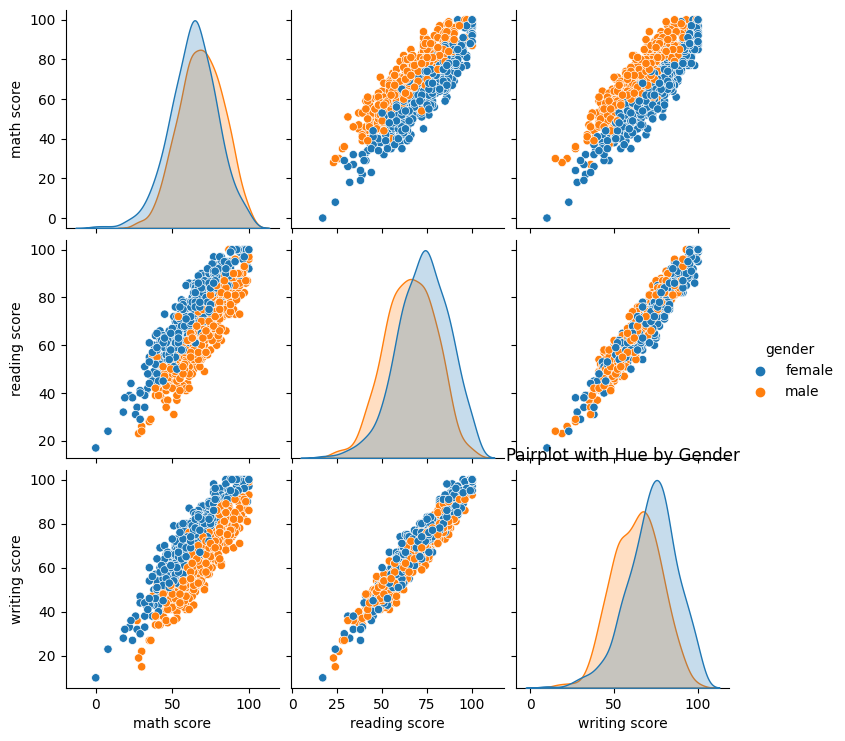

In [ ]:
sns.pairplot(data, hue='gender')
plt.title('Pairplot with Hue by Gender')
plt.show()

it can be seen that female group outperformed the male in almsot every scenario

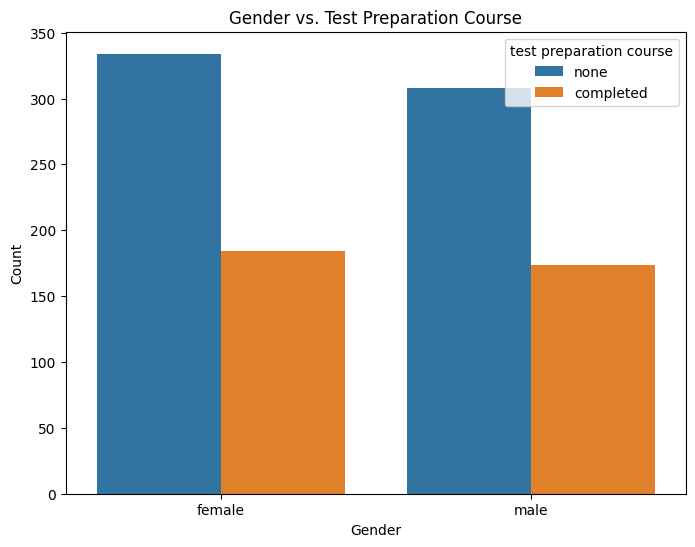

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of Gender by Test Preparation
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='test preparation course', data=data)
plt.title('Gender vs. Test Preparation Course')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


we can witness that more female students have completed the preparation course.

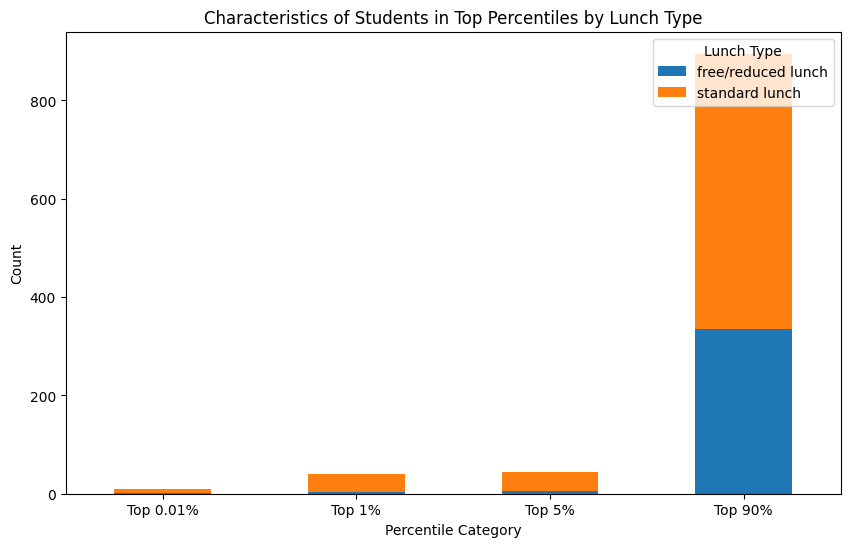

In [ ]:
import pandas as pd

# Loading the cleaned dataset
data = pd.read_csv('/content/drive/MyDrive/cleaned_data_1_2.csv')

#percentiles for math, reading, and writing scores
percentiles = [90, 95, 99]
math_percentiles = data['math score'].quantile(q=[0.01] + [p/100 for p in percentiles])
reading_percentiles = data['reading score'].quantile(q=[0.01] + [p/100 for p in percentiles])
writing_percentiles = data['writing score'].quantile(q=[0.01] + [p/100 for p in percentiles])

# function to categorize students based on their score percentile
def categorize_percentile(score, percentiles):
    if score <= percentiles[0.01]:
        return 'Bottom 1%'
    elif score <= percentiles[0.90]:
        return 'Top 90%'
    elif score <= percentiles[0.95]:
        return 'Top 5%'
    elif score <= percentiles[0.99]:
        return 'Top 1%'
    else:
        return 'Top 0.01%'

# Applying the function to create new columns for percentile categories
data['Math Percentile'] = data['math score'].apply(lambda x: categorize_percentile(x, math_percentiles))
data['Reading Percentile'] = data['reading score'].apply(lambda x: categorize_percentile(x, reading_percentiles))
data['Writing Percentile'] = data['writing score'].apply(lambda x: categorize_percentile(x, writing_percentiles))

# Analyzing characteristics of students in the top percentiles by lunch type
top_percentiles = ['Top 90%', 'Top 5%', 'Top 1%', 'Top 0.01%']
characteristics_by_percentile = data[data['Math Percentile'].isin(top_percentiles)].groupby(['Math Percentile', 'lunch']).size().unstack()

# Plotting the characteristics by lunch type
characteristics_by_percentile.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Characteristics of Students in Top Percentiles by Lunch Type')
plt.xlabel('Percentile Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Lunch Type', loc='upper right')
plt.show()


the standard lunch has been opted by majority of top1 percentile.